## Prediction using Logistic Regression

In [36]:
## import libraries

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.externals import joblib
import matplotlib.pyplot as plt

#### Load dataset

In [37]:
url = "Dataset/FINAL Data.csv"
df = pd.read_csv(url)
include = [ 'Age', 'Gender', 'Religon', 'Race', 'Nature Of Occupation' ,
           'Civil Status' ,'Education Level' ,'Reason' ,'Lifetime Psychiatric Hospitalizations' ,
           'Past Suicide Attempts' ,'Any suicidal thoughts mentioned' ,'Self-Injurious Behaviour' ,
           'Psychiatric Disorders' ,'Past Illnesses' ,'Alcohol/ drug Consumption','Anger',
           'Sleep Problem', 'Social Iscolation', 'Sad/ Weary' , 'Humilated', 'Not Suicide(0)/Suicide(1)']  # Except the year, all the features are taken 
df1 = df[include]
print(df1.head(20))
print(df1.describe())

    Age Gender    Religon       Race  \
0    30      F   Buddhist  Sinhalese   
1    91      F      Islam     Muslim   
2    85      M   Buddhist  Sinhalese   
3    87      M   Buddhist  Sinhalese   
4    59      F   Buddhist  Sinhalese   
5    31      M   Buddhist  Sinhalese   
6    75      F  Christian     Burger   
7    47      M   Buddhist  Sinhalese   
8    58      F  Christian     Burger   
9    36      F      Hindu      Tamil   
10   87      M   Buddhist  Sinhalese   
11   73      F  Christian     Burger   
12   44      M   Buddhist  Sinhalese   
13   62      M   Buddhist  Sinhalese   
14   21      F      Hindu      Tamil   
15   70      M   Buddhist  Sinhalese   
16   68      M      Hindu      Tamil   
17   43      F   Buddhist  Sinhalese   
18   16      M      Other     Burger   
19   35      M      Hindu      Tamil   

                                 Nature Of Occupation Civil Status  \
0   Administrative Executive Managerial & related ...    Unmarried   
1                  

#### Data Preprocessing

In [38]:
categoricals = []
for col, col_type in df1.dtypes.iteritems():
     if col_type == 'O':
          categoricals.append(col)
     else:
          df1[col].fillna(0, inplace=True)

c:\users\dinis\pycharmprojects\suicide-risk-predictor\venv\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


#### LabelEncoder

In [39]:
category_col =['Gender', 'Religon', 'Race', 'Nature Of Occupation' ,
           'Civil Status' ,'Education Level' ,'Reason' ,
           'Psychiatric Disorders' ,'Past Illnesses' ,'Alcohol/ drug Consumption'] 
labelEncoder = preprocessing.LabelEncoder()
mapping_dict={}
for col in category_col:
    df1[col] = labelEncoder.fit_transform(df1[col])
    le_name_mapping = dict(zip(labelEncoder.classes_, labelEncoder.transform(labelEncoder.classes_)))
    mapping_dict[col]=le_name_mapping
print(df1.head(20))



    Age  Gender  Religon  Race  Nature Of Occupation  Civil Status  \
0    30       0        0     3                     0             2   
1    91       0        3     1                     8             1   
2    85       1        0     3                     9             1   
3    87       1        0     3                    12             1   
4    59       0        0     3                     4             2   
5    31       1        0     3                     1             2   
6    75       0        1     0                     2             0   
7    47       1        0     3                    12             1   
8    58       0        1     0                     2             2   
9    36       0        2     4                     2             3   
10   87       1        0     3                    12             1   
11   73       0        1     0                     3             3   
12   44       1        0     3                     1             1   
13   62       1     

c:\users\dinis\pycharmprojects\suicide-risk-predictor\venv\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


**Analysing Data**


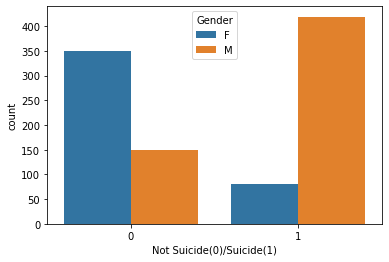

In [40]:
#Comparing Gender
sns.countplot(x="Not Suicide(0)/Suicide(1)",hue="Gender",data=df)


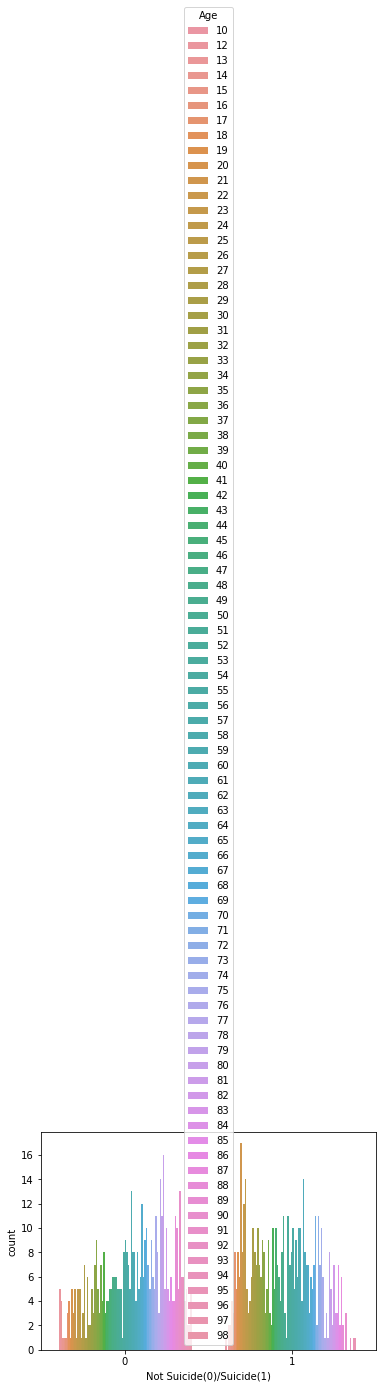

In [41]:
#Comparing Age
sns.countplot(x="Not Suicide(0)/Suicide(1)",hue="Age",data=df)
# plt.savefig('Age.svg')

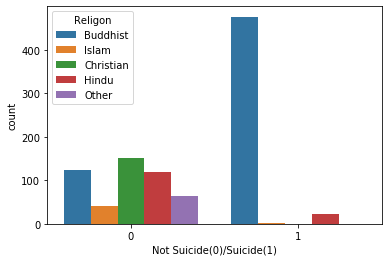

In [42]:
#Comparing Religion
sns.countplot(x="Not Suicide(0)/Suicide(1)",hue="Religon",data=df)


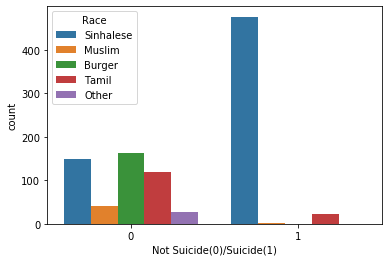

In [43]:
#Comparing Race
sns.countplot(x="Not Suicide(0)/Suicide(1)",hue="Race",data=df)


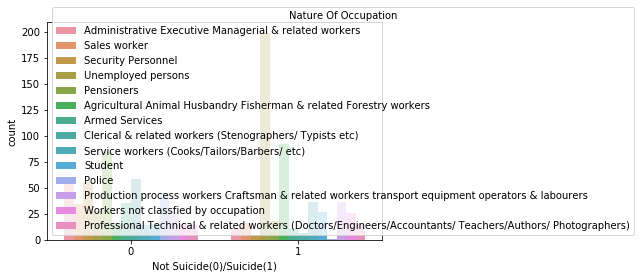

In [44]:
#Comparing Nature Of Occupation
sns.countplot(x="Not Suicide(0)/Suicide(1)",hue="Nature Of Occupation",data=df)


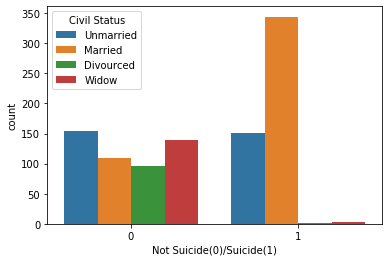

In [45]:
#Comparing Civil Status
sns.countplot(x="Not Suicide(0)/Suicide(1)",hue="Civil Status",data=df)


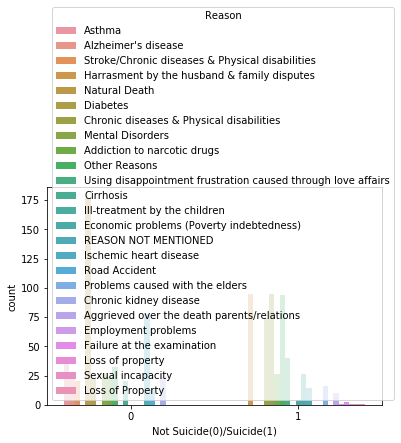

In [46]:
#Comparing Reason
sns.countplot(x="Not Suicide(0)/Suicide(1)",hue="Reason",data=df)

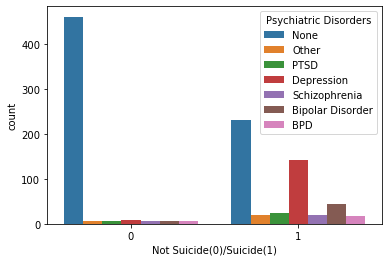

In [47]:
#Comparing Psychiatric Disorders
sns.countplot(x="Not Suicide(0)/Suicide(1)",hue="Psychiatric Disorders",data=df)


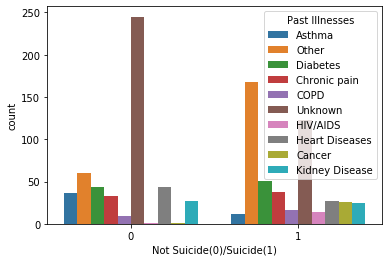

In [48]:
#Comparing Past Illnesses
sns.countplot(x="Not Suicide(0)/Suicide(1)",hue="Past Illnesses",data=df)




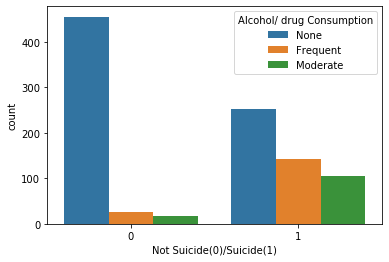

In [49]:
#Comparing Alcohol/ drug Consumption
sns.countplot(x="Not Suicide(0)/Suicide(1)",hue="Alcohol/ drug Consumption",data=df)


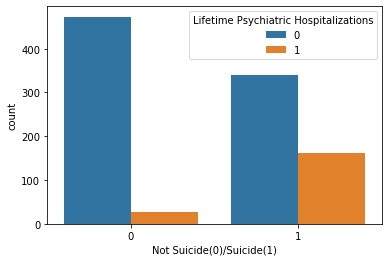

In [50]:
#Comparing Lifetime Psychiatric Hospitalizations
sns.countplot(x="Not Suicide(0)/Suicide(1)",hue="Lifetime Psychiatric Hospitalizations",data=df)


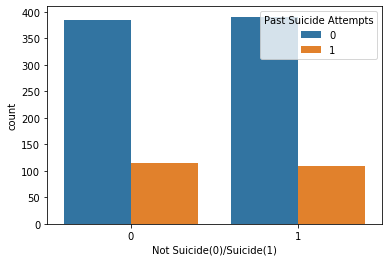

In [51]:
#Comparing Past Suicide Attempts
sns.countplot(x="Not Suicide(0)/Suicide(1)",hue="Past Suicide Attempts",data=df)


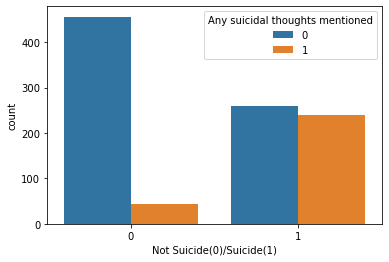

In [52]:
#Comparing Any suicidal thoughts mentioned
sns.countplot(x="Not Suicide(0)/Suicide(1)",hue="Any suicidal thoughts mentioned",data=df)


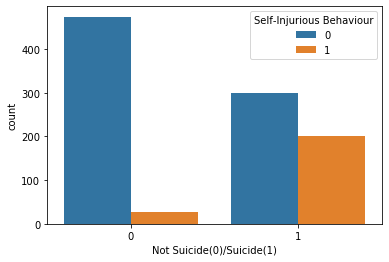

In [53]:
#Comparing Self-Injurious Behaviour
sns.countplot(x="Not Suicide(0)/Suicide(1)",hue="Self-Injurious Behaviour",data=df)


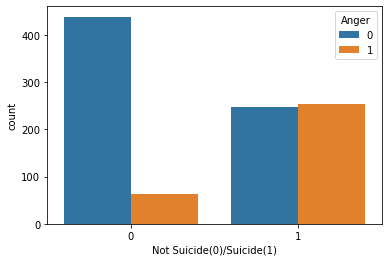

In [54]:
#Comparing Anger
sns.countplot(x="Not Suicide(0)/Suicide(1)",hue="Anger",data=df)


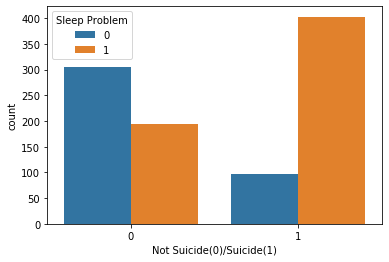

In [55]:
#Comparing Sleep Problem
sns.countplot(x="Not Suicide(0)/Suicide(1)",hue="Sleep Problem",data=df)

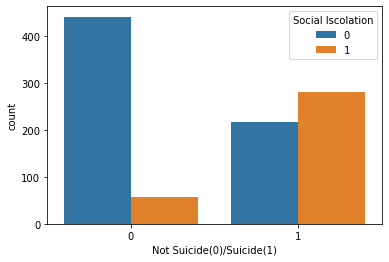

In [56]:
#Comparing Social Iscolation
sns.countplot(x="Not Suicide(0)/Suicide(1)",hue="Social Iscolation",data=df)

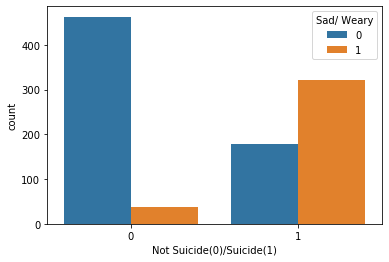

In [57]:
#Comparing Sad/ Weary
sns.countplot(x="Not Suicide(0)/Suicide(1)",hue="Sad/ Weary",data=df)


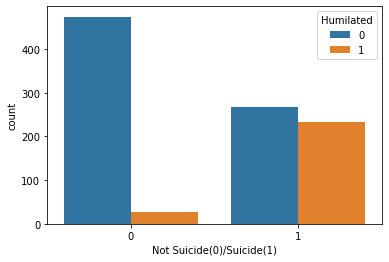

In [58]:

#Comparing Humilated
sns.countplot(x="Not Suicide(0)/Suicide(1)",hue="Humilated",data=df)
plt.savefig('Humilated.svg')

In [60]:
feature_cols = ['Age', 'Gender', 'Religon', 'Race', 'Nature Of Occupation' ,
           'Civil Status' ,'Education Level' ,'Reason' ,'Lifetime Psychiatric Hospitalizations' ,
           'Past Suicide Attempts' ,'Any suicidal thoughts mentioned' ,'Self-Injurious Behaviour' ,
           'Psychiatric Disorders' ,'Past Illnesses' ,'Alcohol/ drug Consumption','Anger',
           'Sleep Problem', 'Social Iscolation', 'Sad/ Weary' , 'Humilated']
X = df1[feature_cols] # Features
y = df1['Not Suicide(0)/Suicide(1)']

In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [62]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

c:\users\dinis\pycharmprojects\suicide-risk-predictor\venv\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [63]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))



Accuracy: 0.93
Precision: 0.9230769230769231
Recall: 0.9411764705882353
